<a href="https://colab.research.google.com/github/OlegV12/Stats/blob/finalProject/statsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for Amsterdam real estate dataset.

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/gdrive/MyDrive/HousingPrices-Amsterdam-August-2021.csv')

In [6]:
df.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


Delete 'Unnamed: 0' column and convert Zip into int

In [11]:
df.drop(columns='Unnamed: 0', inplace=True)
df['Zip'] = df['Zip'].str.split(' ').str.get(0).astype(int)

# Data overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


Number of null values for 'Price' column

In [12]:
df[df['Price'].isnull()]

,Address,Zip,Price,Area,Room,Lon,Lat
73,"Falckstraat 47 A, Amsterdam",1017,NaN,147,3,4.897454,52.360707
321,"Haarlemmerweg 705, Amsterdam",1067,NaN,366,12,4.787874,52.383877
610,"Zeeburgerkade 760, Amsterdam",1019,NaN,107,3,4.945022,52.369244
727,"Suikerplein 16, Amsterdam",1013,NaN,81,3,4.880976,52.389623


Replace null values with median

In [13]:
df['Price'].fillna(df['Price'].median(), inplace=True)

Features statistics overview of dataset

In [15]:
df.describe()

,Zip,Price,Area,Room,Lon,Lat
count,924.000000,9.240000e+02,924.000000,924.000000,924.000000,924.000000
mean,1056.742424,6.213941e+05,95.952381,3.571429,4.888605,52.363326
std,28.903784,5.379214e+05,57.447436,1.592332,0.053140,0.024028
min,1011.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,1025.000000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,1059.000000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,1077.000000,6.992500e+05,113.000000,4.000000,4.922337,52.377598
max,1109.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


Main features distribution within dataset

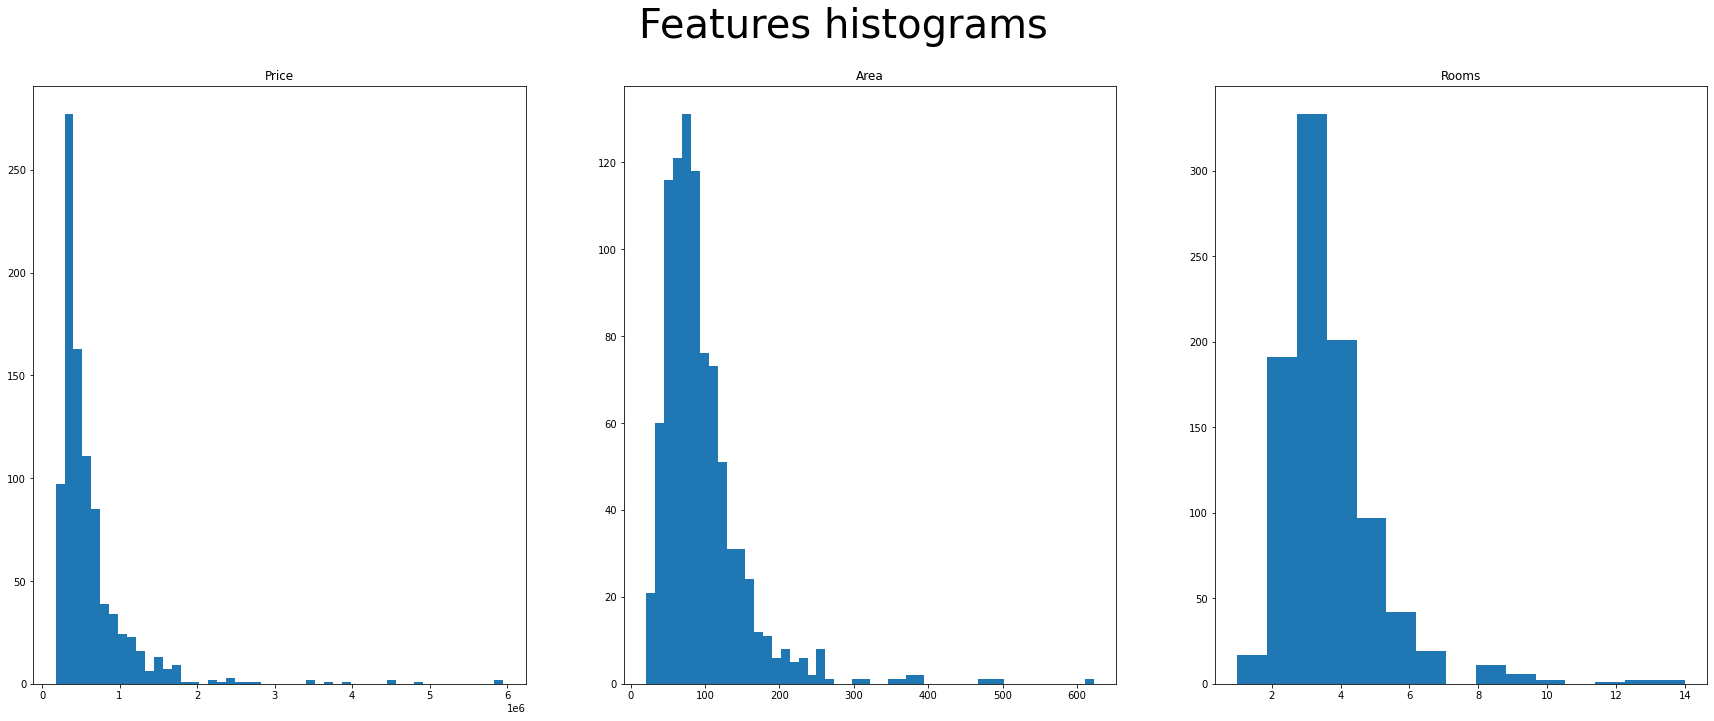

In [16]:
plt.figure(figsize=(30,11),)

price_plot = plt.subplot(131,  title='Price')
plt.hist(df.Price, bins=50,)


plt.subplot(132, title='Area',)
plt.hist(df.Area,bins=50)


plt.subplot(133, title='Rooms')
plt.hist(df.Room,bins=15)

plt.suptitle('Features histograms', fontsize='40')
plt.show()

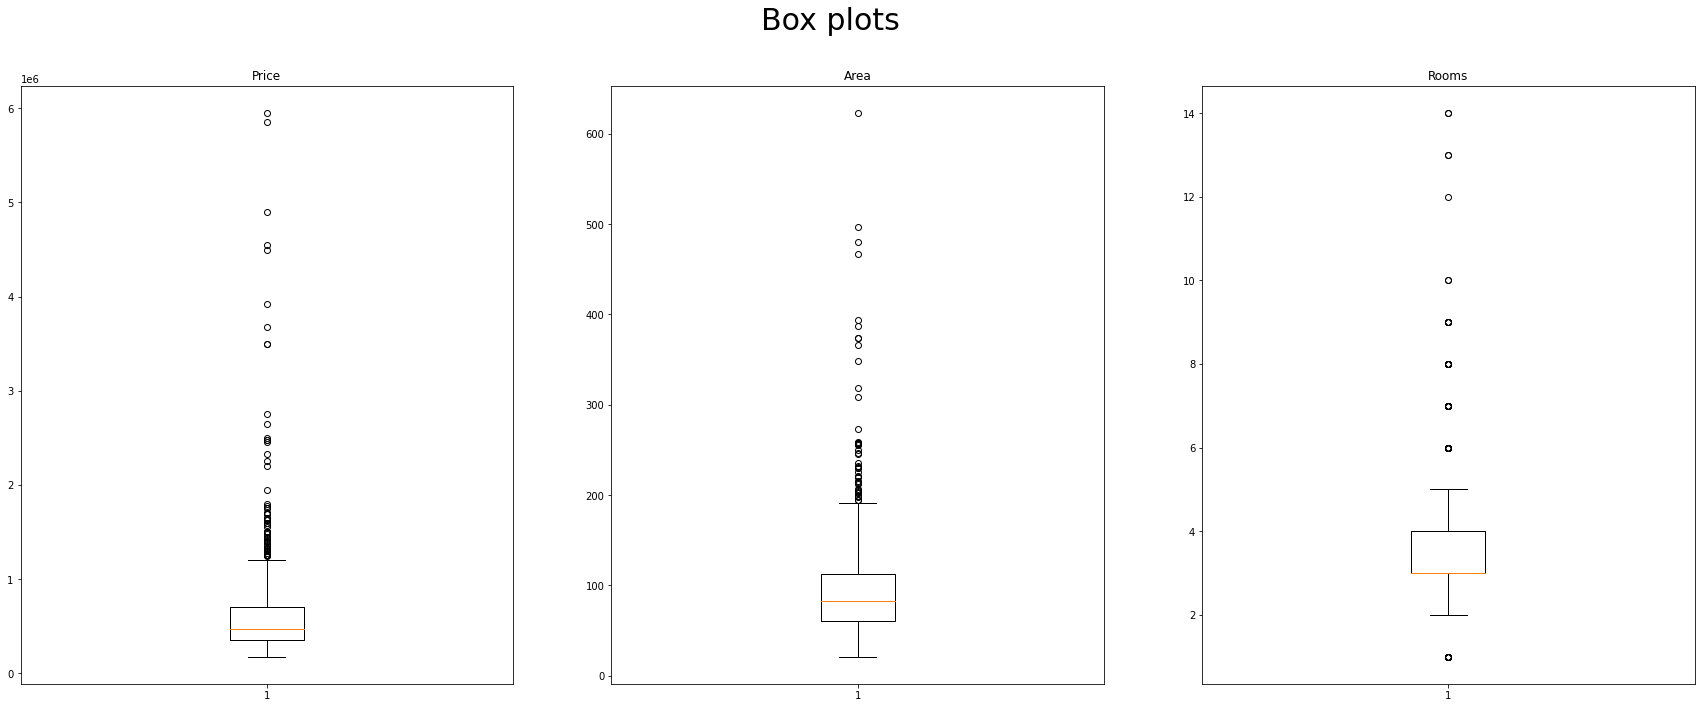

In [17]:
plt.figure(figsize=(30,11),)

plt.subplot(131,  title='Price')
plt.boxplot(df.Price,)


plt.subplot(132, title='Area',)
plt.boxplot(df.Area,)


plt.subplot(133, title='Rooms',)
plt.boxplot(df.Room,)

plt.suptitle('Box plots', fontsize='30')
plt.show()

We can observe outliers within price and area features, and relatevily less otliers within rooms feature distribution.

Let's check for scatterplots and correlation matrix

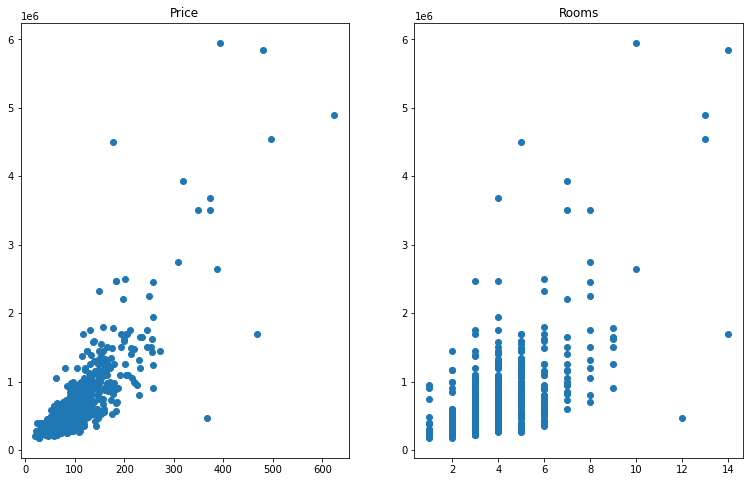

In [19]:
plt.figure(figsize=(20, 8),)


plt.subplot(131,  title='Price')
plt.scatter(df['Area'], df['Price'])


plt.subplot(132, title='Rooms',)
plt.scatter(df['Room'], df['Price'])

plt.show()


<Figure size 432x288 with 0 Axes>

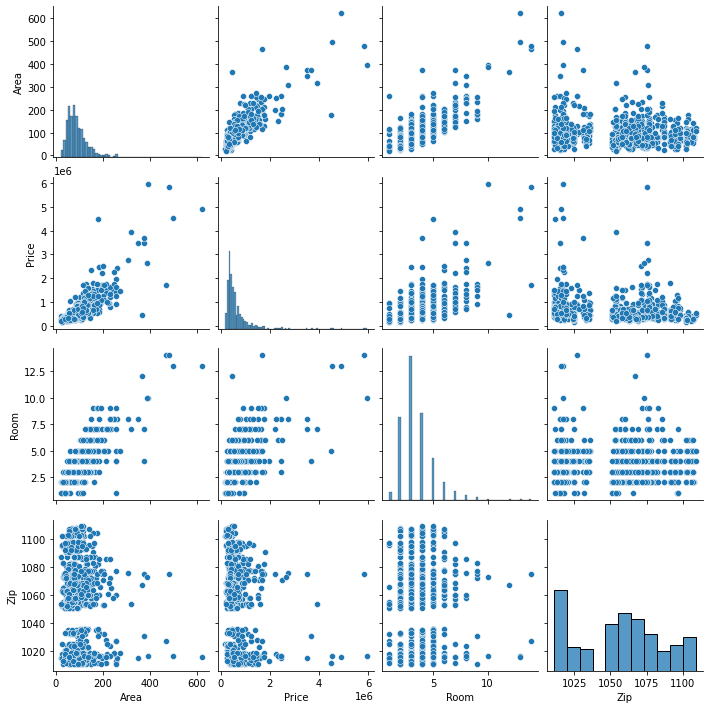

In [20]:
plt.figure()
sns.pairplot(df[['Area', 'Price', 'Room', 'Zip']],)
plt.show()

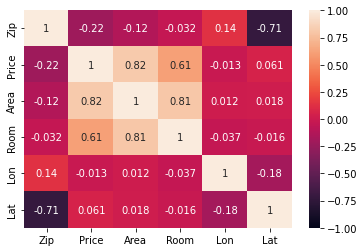

In [21]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Price is correlated with area and rooms.

Dataset on map

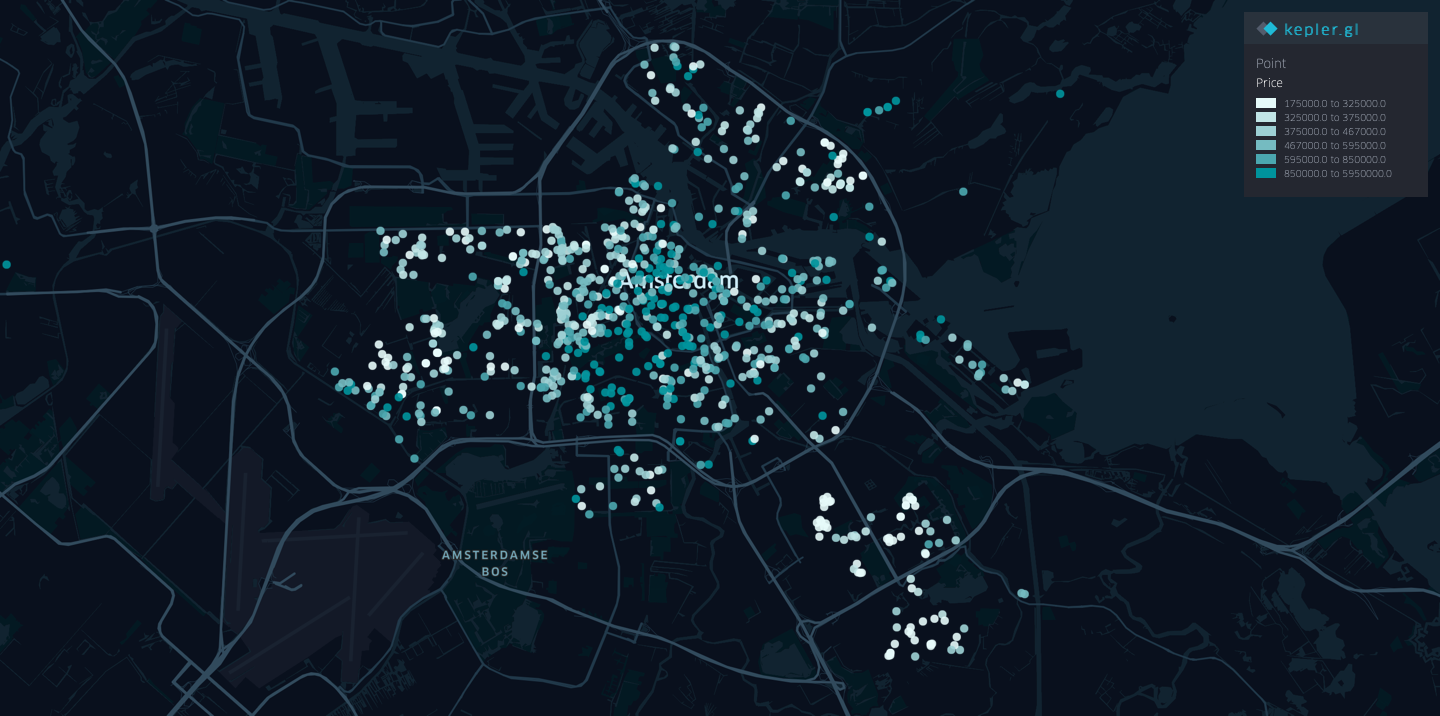

Here we can see that generally  prices are lower on suburbs and higher in city center. 

Let's check for the same map but based on living area distribution.

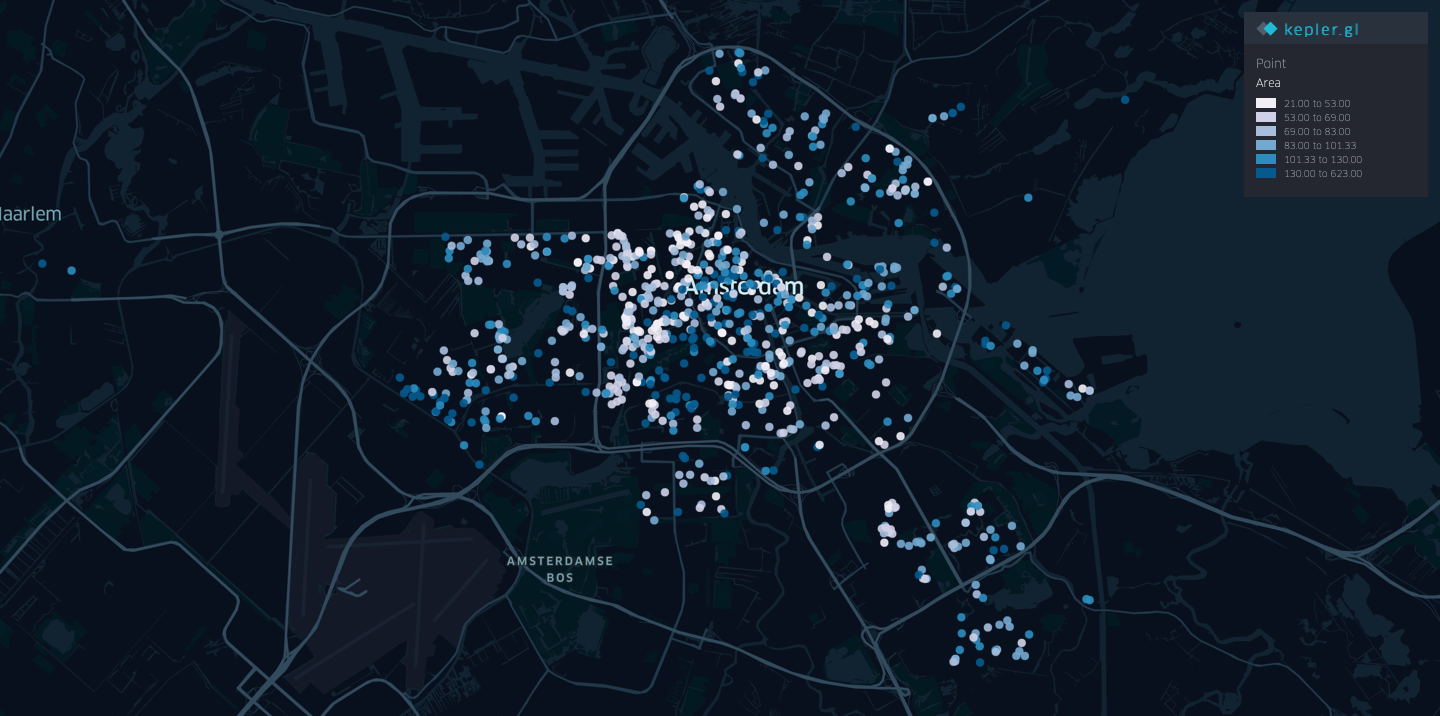

We can observe that real estate size is mixed within city center with prevailing large housing outside city center.  